# MATH 248 HW 4

## Question 1
(10 points) Make an animation of 31 frames showing a point moving counter clockwise along the unit circle, starting from the point (1,0) and returning to the same point. Plot the unit circle as a red solid curve, and the point as a blue dot.
* Hint: use the parametric curve $(\cos\theta, \sin\theta)$, the point's position corresponds to $\theta=0, \pi/15, 2\pi/15, ..., 2\pi$.

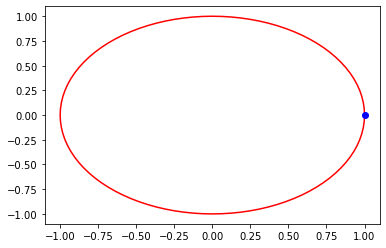

In [8]:
from matplotlib.pyplot import *
from matplotlib.animation import FuncAnimation
from numpy import linspace, sin, cos
from math import pi

fig = figure()
theta = linspace(0, 2*pi, 101)
points = plot(cos(theta), sin(theta), '-r', [1], [0], 'bo')

def update(theta):
    points[1].set_data([cos(theta)], [sin(theta)])

anim = FuncAnimation(fig, update, frames=linspace(0, 2*pi, 31))

from IPython.display import HTML

HTML(anim.to_html5_video())


## Question 2
A wolf has 3 hunting sites. On each day, if the wolf is in site i, it moves to site j with probability $P_{ij}$. The movement of the wolf can be modeled as a Markov chain, where the states are the hunting sites. The matrix P, which $ij$-entry is $P_{ij}$, is called the transition matrix. Note that the row sums of the matrix P are all 1. The probability that the wolf is in a specific site on any day $t>0$ is uniquely determined by the transition matrix $P$, and the site that the wolf is in initially on day 0. 

The attached CSV file contains observastions of the location of the wolf for 1001 consecutive days, i.e., 1000 transitions. The first column is the time (the day the observsation is made), and the second colummn is the site that the wolf is in (labeled as 1, 2 or 3).

a) (10 points) Read the CSV file. For each site $i$, compute the frequencies $P_{ij}$ of the transitions from the site to a site $j$, for $i,j=1,2,3$, and store the frequencies in a $3\times3$ matrix $P$. 

In [2]:
import pandas
from numpy import zeros

data = pandas.read_csv("data.csv")

n = data.shape[0]
m = max(data.state)
P = zeros([m, m])
for k in range(0, n-1):
    i = data.state[k] - 1 
    j = data.state[k+1] - 1 
    P[i, j] = P[i, j] + 1
for i in range(m):
    P[i,:] = P[i,:] / sum(P[i,:])
print(P)

[[0.         0.27329193 0.72670807]
 [0.23728814 0.25423729 0.50847458]
 [0.52321429 0.         0.47678571]]


b) (10 points) Using the transition matrix $P$ derived in Question 1, simulate the movement of the wolf for 30 days, starting from site 3. Plot the location of the wolf (as 1, 2, 3) on each day as a scatter plot (day in horizontal axis, location in y axis, plot as dots).

### Solution

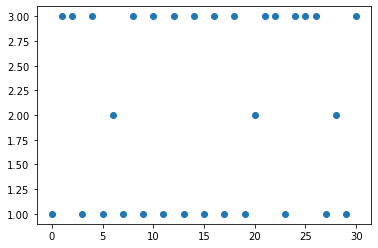

In [5]:
from numpy import zeros, array, linspace
from numpy.random import choice, seed

def Markov(T, A, X0=0):
    X = array([0] * (T+1))
    X[0] = X0
    n, m = A.shape
    for i in range(1, T+1):
        j = choice(n, p = A[X[i-1],:])
        X[i] = j
    return X+1

seed(1)
X = Markov(30, P)

from matplotlib.pyplot import plot
plot(linspace(0, 30, 31), X, 'o')
